In [30]:
import requests
import ssl
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow.keras.utils as np_utils
try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    # Legacy Python that doesn't verify HTTPS certificates by default
    pass
else:
    # Handle target environment that doesn't support HTTPS verification
    ssl._create_default_https_context = _create_unverified_https_context

In [31]:
import matplotlib.pyplot as plt
import matplotlib.image as img

#define a function called plot_image
def plot_image(image):
    fig = plt.gcf()
    fig.set_size_inches(2, 2)
    plt.imshow(image, cmap='binary')
    plt.show()

In [32]:
'''category and normalize input data for further analyzing'''
ds = tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)= ds.load_data()

x_train_normalize = tf.keras.utils.normalize(x_train)
x_test_normalize = tf.keras.utils.normalize(x_test)

y_trainOneHot = np_utils.to_categorical(y_train)
y_testOneHot = np_utils.to_categorical(y_test)

In [33]:
#tf.keras.datasets.mnist.load_data()

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 116 125 171 255 255 150  93   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 169 253 253 253 253 253 253 218  30
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 169 253 253 253 213 142 176 253 253 122
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  52 250 253 210  32  12   0   6 206 253 140
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  77 251 210  25   0   0   0 122 248 253  65
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  31  18   0   0   0   0 209 25

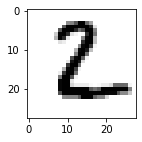

'print(x_test[1])\nplot_image(x_test[1])\nprint(y_test[1])'

In [112]:
print(x_test[1])
plot_image(x_test[1])
'''print(x_test[1])
plot_image(x_test[1])
print(y_test[1])'''

In [35]:
print(y_test[1])
print(y_testOneHot[1])

2
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


In [39]:
'''creat CNN model'''
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D


#further info of Sequential():
#https://keras-cn.readthedocs.io/en/latest/getting_started/sequential_model/
#https://keras-cn.readthedocs.io/en/latest/models/sequential/

model = Sequential()

#filter為16, Kernel size為(5,5),Padding為(same)
model.add(Conv2D(filters=16,
                 kernel_size=(5,5),
                 padding='same',
                 input_shape=(28,28,1), 
                 activation='relu'))

#MaxPooling size is (2,2)
model.add(MaxPooling2D(pool_size=(2,2)))

#filter is 36
model.add(Conv2D(filters=36,
                 kernel_size=(5,5),
                 padding='same',
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

#Drop掉部分神經元避免overfitting
model.add(Dropout(0.25))

#平坦化
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

In [41]:
'''train model'''
#配置學習過程: compile函數
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

#訓練模型: fit函數
train_history=model.fit(x=x_train_normalize, 
                        y=y_trainOneHot,validation_split=0.2, 
                        epochs=20, batch_size=300,verbose=2)


Epoch 1/20
160/160 - 16s - loss: 0.5932 - accuracy: 0.8105 - val_loss: 0.1236 - val_accuracy: 0.9609 - 16s/epoch - 101ms/step
Epoch 2/20
160/160 - 16s - loss: 0.1691 - accuracy: 0.9500 - val_loss: 0.0755 - val_accuracy: 0.9763 - 16s/epoch - 102ms/step
Epoch 3/20
160/160 - 18s - loss: 0.1187 - accuracy: 0.9638 - val_loss: 0.0608 - val_accuracy: 0.9804 - 18s/epoch - 113ms/step
Epoch 4/20
160/160 - 17s - loss: 0.0969 - accuracy: 0.9702 - val_loss: 0.0529 - val_accuracy: 0.9834 - 17s/epoch - 107ms/step
Epoch 5/20
160/160 - 18s - loss: 0.0849 - accuracy: 0.9734 - val_loss: 0.0456 - val_accuracy: 0.9860 - 18s/epoch - 111ms/step
Epoch 6/20
160/160 - 16s - loss: 0.0740 - accuracy: 0.9773 - val_loss: 0.0424 - val_accuracy: 0.9868 - 16s/epoch - 102ms/step
Epoch 7/20
160/160 - 16s - loss: 0.0661 - accuracy: 0.9797 - val_loss: 0.0398 - val_accuracy: 0.9884 - 16s/epoch - 100ms/step
Epoch 8/20
160/160 - 16s - loss: 0.0591 - accuracy: 0.9819 - val_loss: 0.0389 - val_accuracy: 0.9884 - 16s/epoch - 101

313/313 [==============================] - 1s 4ms/step
6


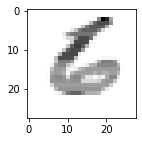

In [75]:
#預測結果
#from tensorflow.keras import models
test=x_test_normalize
prediction=np.argmax(model.predict(test),axis=-1)

'''
print(prediction[9999])
plot_image(x_test_normalize[9999])
'''

In [114]:
from matplotlib import image
img = image.imread("b.jpg")
#plot_image(img)
img_normalize = tf.keras.utils.normalize(img)
#prediction=np.argmax(model.predict(img_normalize))
print(img)
print(x_test[1])
#print(x_test)
#print(img_normalize)
#print(prediction)
#print(x_test_normalize[1])

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0  

In [79]:
print(prediction[51:100])
print(y_test[51:100])

[3 5 5 6 0 4 1 9 5 7 8 9 3 7 4 6 4 3 0 7 0 2 9 1 7 3 2 9 7 7 6 2 7 8 4 7 3
 6 1 3 6 9 3 1 4 1 7 6 9]
[3 5 5 6 0 4 1 9 5 7 8 9 3 7 4 6 4 3 0 7 0 2 9 1 7 3 2 9 7 7 6 2 7 8 4 7 3
 6 1 3 6 9 3 1 4 1 7 6 9]
